In [607]:
#import libraries
import random
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import math
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [608]:
#import training dataset
X = pd.read_csv("train.csv")
y = X.pop('Survived')

In [609]:
#fill empty spaces in Age
X['Age'].fillna(X['Age'].mean(), inplace = True)


In [610]:
X.drop(['PassengerId','Name','Ticket'], axis = 1, inplace=True)

In [611]:
# Male replace to 1, Female replace to 0 
def MF_to_num(x):
    if x == 'male':
        return 1
    else:
        return 0
    
# rewrite only with first letter or if it is NAN value rewrite to "N"   
def cabin(x):
    try:
        return x[0]
    except:
        return "N"

#apply out methods    
X['Sex'] = X.Sex.apply(MF_to_num)
X['Cabin'] = X.Cabin.apply(cabin)

In [612]:
X.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [613]:
vector = ['Cabin','Embarked']

for feature in vector:
    X[feature].fillna("None", inplace = True)
    # dummy array
    dummies = pd.get_dummies(X[feature],prefix=feature)
    # concatination of X with dummies
    X = pd.concat([X,dummies],axis = 1)
    # delete Cabin and Embarked
    X.drop([feature],axis = 1,inplace = True)



In [614]:
# X_test.describe()

In [615]:
X.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Cabin_T,Embarked_C,Embarked_None,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.016835,0.052750,0.066218,0.037037,0.035915,0.014590,0.004489,0.771044,0.001122,0.188552,0.002245,0.086420,0.722783
std,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.128725,0.223659,0.248802,0.188959,0.186182,0.119973,0.066890,0.420397,0.033501,0.391372,0.047351,0.281141,0.447876
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [616]:
# building primitive prediction model with Regression
model = RandomForestClassifier(n_estimators=100, max_depth=9,random_state=1)
model.fit(X,y)
# score
print (model.score(X,y))

0.92480359147


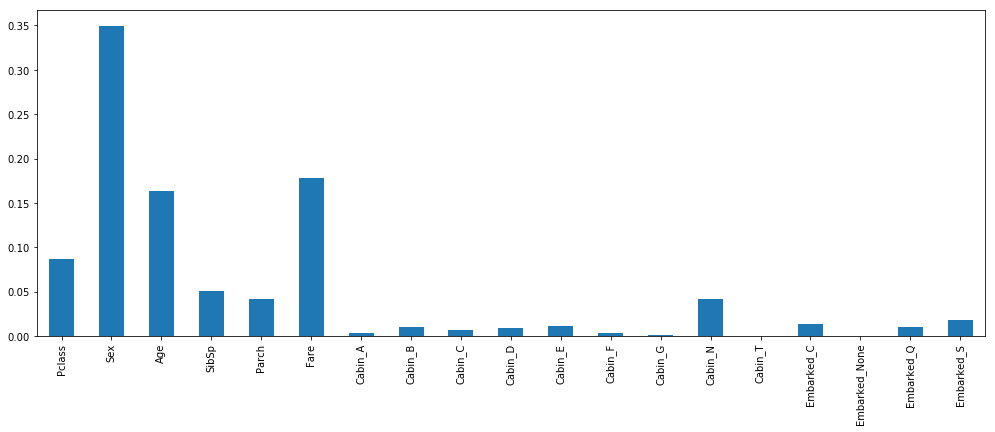

In [617]:
#the importance of our features
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.plot(kind='bar',figsize=(17,6))

In [618]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.20,random_state = 1)

trees 10
score  0.765363128492
trees 30
score  0.759776536313
trees 50
score  0.748603351955
trees 90
score  0.759776536313
trees 100
score  0.765363128492
trees 120
score  0.77094972067
trees 130
score  0.77094972067
trees 200
score  0.759776536313
trees 500
score  0.754189944134
trees 1000
score  0.754189944134


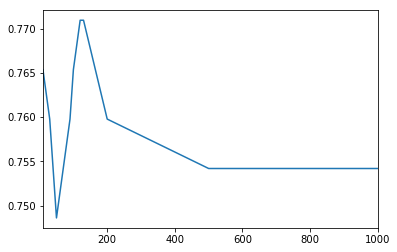

In [619]:
# brute forcing of optimal parameters of predicting model 
# choosing trees
n_estimators = [10,30,50,90,100,120,130,200,500,1000]
result = list()
for trees in n_estimators:
    model = RandomForestClassifier(trees,random_state=5)
    model.fit(X_train,y_train)
    print("trees", trees)
    print("score ", model.score(X_test,y_test))
    result.append(model.score(X_test,y_test))

pd.Series(result,n_estimators).plot()    

max_f auto
score  0.77094972067
max_f None
score  0.776536312849
max_f sqrt
score  0.77094972067
max_f log2
score  0.77094972067


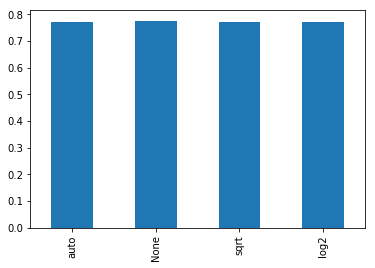

In [620]:
# best parameters for trees is 130
#choosing max_features
max_features = ["auto", None, "sqrt", "log2"]
results = list()
for max_f in max_features:
    model = RandomForestClassifier(n_estimators=130, max_features=max_f,random_state=5)
    model.fit(X_train,y_train)
    print("max_f",max_f)
    print("score ", model.score(X_test,y_test))
    results.append(model.score(X_test,y_test))
pd.Series(results, max_features).plot(kind='bar')    

max_depth  5
score  0.782122905028
max_depth  6
score  0.782122905028
max_depth  7
score  0.776536312849
max_depth  8
score  0.77094972067
max_depth  9
score  0.782122905028
max_depth  10
score  0.793296089385
max_depth  15
score  0.782122905028
max_depth  20
score  0.776536312849
max_depth  30
score  0.776536312849
max_depth  40
score  0.776536312849


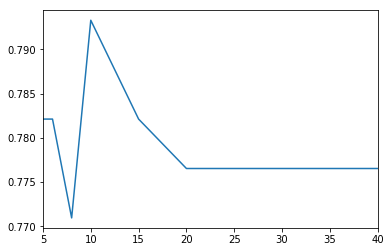

In [621]:
# None parameter is quite better than others
# choosing max_depth
max_depth =[5,6,7,8,9,10,15,20,30,40]
results = list()

for max_d in max_depth:
    model = RandomForestClassifier(n_estimators=130, max_features=None, max_depth = max_d,random_state=5)
    model.fit(X_train,y_train)
    print("max_depth ",max_d)
    print("score ", model.score(X_test,y_test))
    results.append(model.score(X_test,y_test))
pd.Series(results,max_depth).plot()    

min_s  1
score  0.782122905028
min_s  2
score  0.793296089385
min_s  3
score  0.793296089385
min_s  4
score  0.787709497207
min_s  5
score  0.787709497207
min_s  6
score  0.782122905028
min_s  7
score  0.782122905028
min_s  8
score  0.787709497207
min_s  9
score  0.77094972067
min_s  10
score  0.776536312849


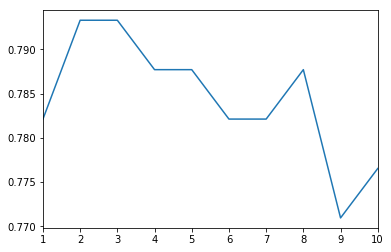

In [622]:
min_sample_leaf = [1,2,3,4,5,6,7,8,9,10]
results = list()
for min_s in min_sample_leaf:
    model = RandomForestClassifier(n_estimators=100, 
                                   min_samples_leaf = min_s,
                                   criterion='entropy',
                                   max_features=None, 
                                   max_depth = 10,
                                   random_state=5)
    model.fit(X_train,y_train)
    print("min_s ", min_s)
    print("score ", model.score(X_test,y_test))
    results.append(model.score(X_test,y_test))
pd.Series(results,min_sample_leaf).plot()    

In [623]:
#final model for testing
model = RandomForestClassifier(n_estimators=130, 
                               criterion='entropy',
                               min_samples_leaf =3,
                               max_features=None, 
                               max_depth = 10,
                               random_state=5)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=3,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=130, n_jobs=1, oob_score=False, random_state=5,
            verbose=0, warm_start=False)

In [624]:
print(model.score(X_test,y_test))

0.793296089385


In [625]:
#final model to predict
model = RandomForestClassifier(n_estimators=130,
                               criterion='entropy',
                               min_samples_leaf=2,
                               max_features=7, 
                               max_depth=10,
                               random_state=47)
model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features=7, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=130, n_jobs=1, oob_score=False, random_state=47,
            verbose=0, warm_start=False)

In [626]:
#the same data preparation for testing set
X_test = pd.read_csv("test.csv")
X_test['Age'].fillna(X_test['Age'].mean(), inplace = True)
X_test['Fare'].fillna(X_test['Fare'].mean(), inplace = True)
X_test.drop(['PassengerId','Name','Ticket'], axis = 1, inplace=True)

X_test['Sex'] = X_test.Sex.apply(MF_to_num)
X_test['Cabin'] = X_test.Cabin.apply(cabin)
  
for feature in vector:
    X_test[feature].fillna("None", inplace = True)
    dummies_test = pd.get_dummies(X_test[feature],prefix=feature)
    X_test = pd.concat([X_test,dummies_test],axis = 1)
    X_test.drop([feature],axis = 1,inplace = True)


In [627]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [628]:
# Solution score in Kaggle = 0.79426 (1396-1896 out of 7217)